### Проанализируйте ряды, сделайте их стационарными.

_p.s. кроме international-airline-passengers.csv_

In [53]:
# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
# from mpl_finance import candlestick_ohlc

# import warnings
# warnings.simplefilter('ignore')

plt.style.use('ggplot')
# sns.set()
%matplotlib inline

In [153]:
# os.getcwd(), os.chdir()

In [54]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    
def tsplot(y, lags=None, figsize=(14, 12), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sns.set()
        plt.tight_layout()
    return    

### _'weekly-closings-of-the-dowjones-'_

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


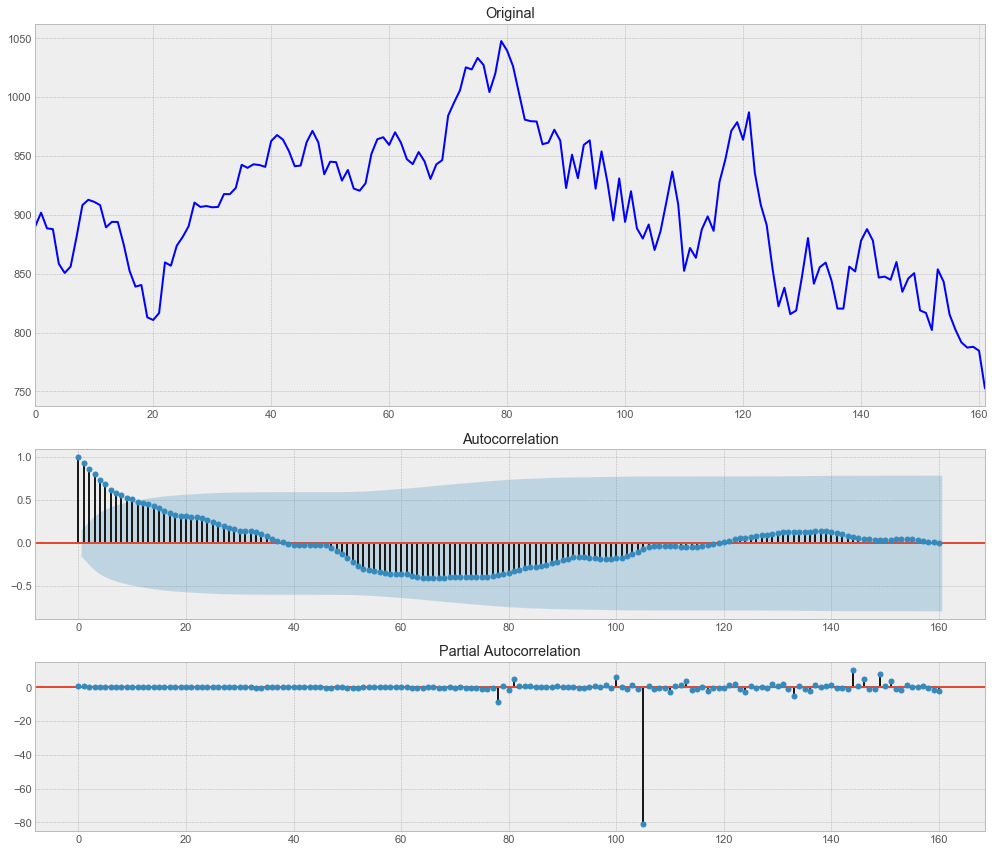

In [55]:
data = pd.read_csv('./Series/weekly-closings-of-the-dowjones-.csv')['Close']
tsplot(data, lags=len(data)-2)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. \
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.651876
p-value                          0.456062
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


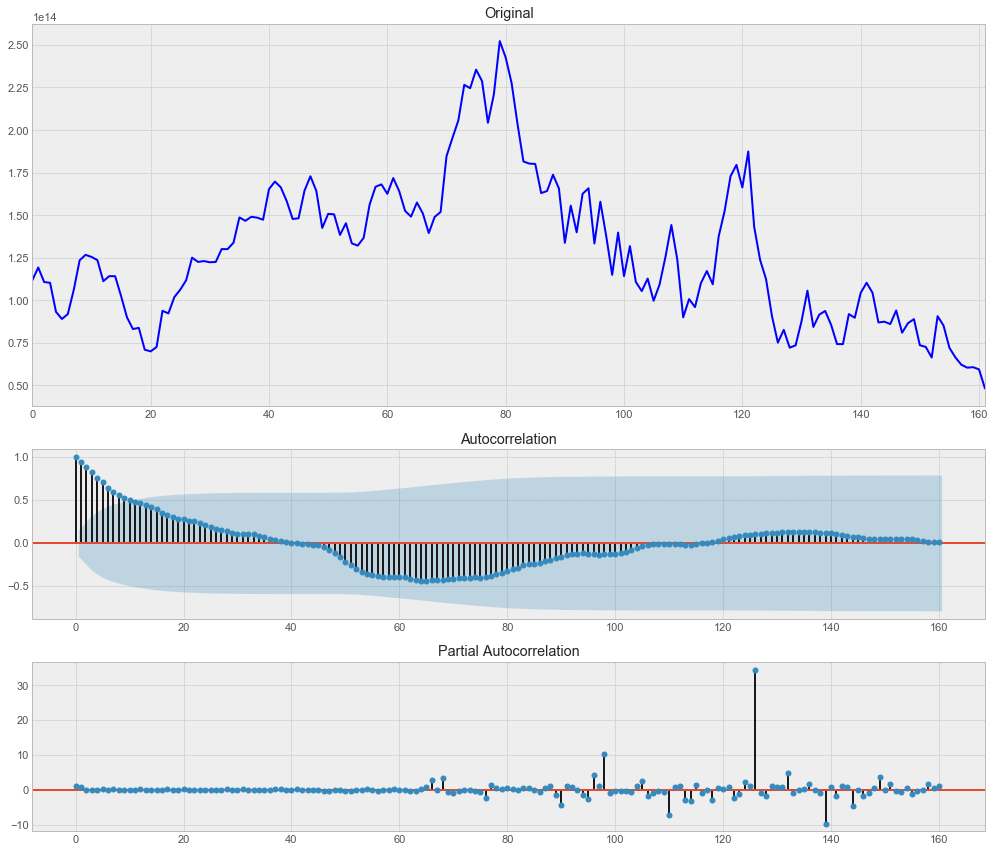

In [56]:
series = boxcox(data, 5)
tsplot(series, lags=len(series)-2)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -5.598128
p-value                          0.000001
#Lags Used                       5.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


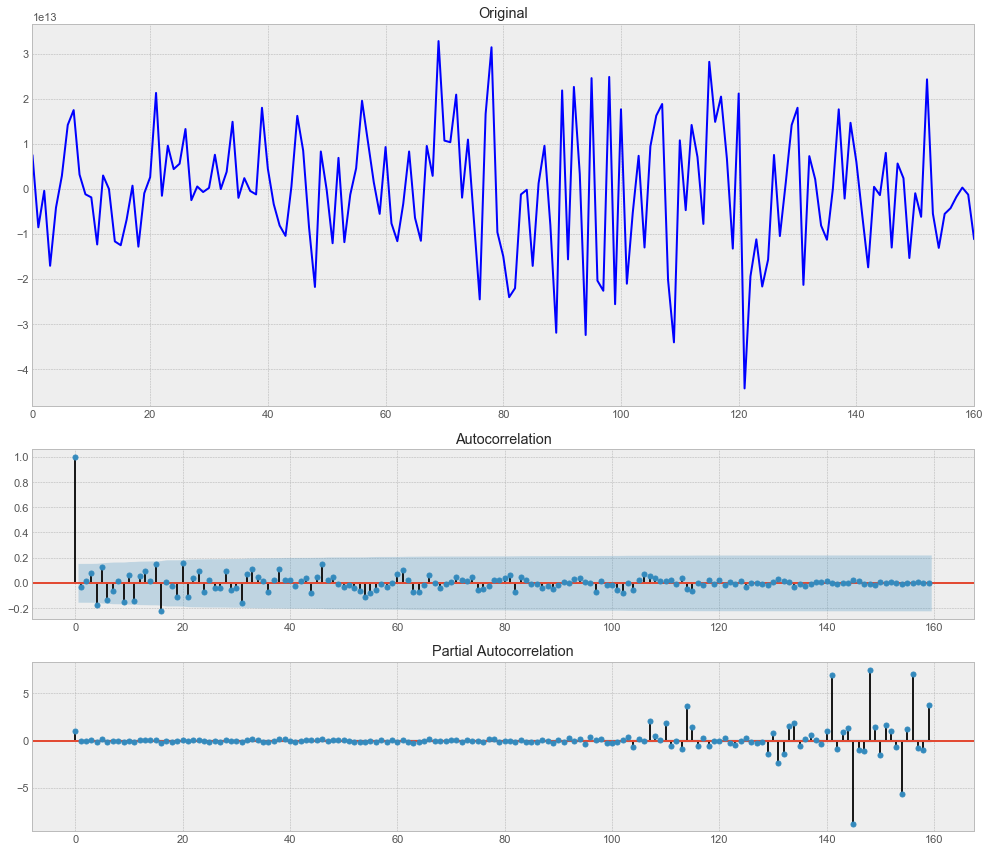

In [57]:
# series = np.diff(data_series, 1)
series = series[1:] - series[:-1]
tsplot(series, lags=len(series)-2)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

Results of Dickey-Fuller Test:
Test Statistic                  -3.208355
p-value                          0.019506
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


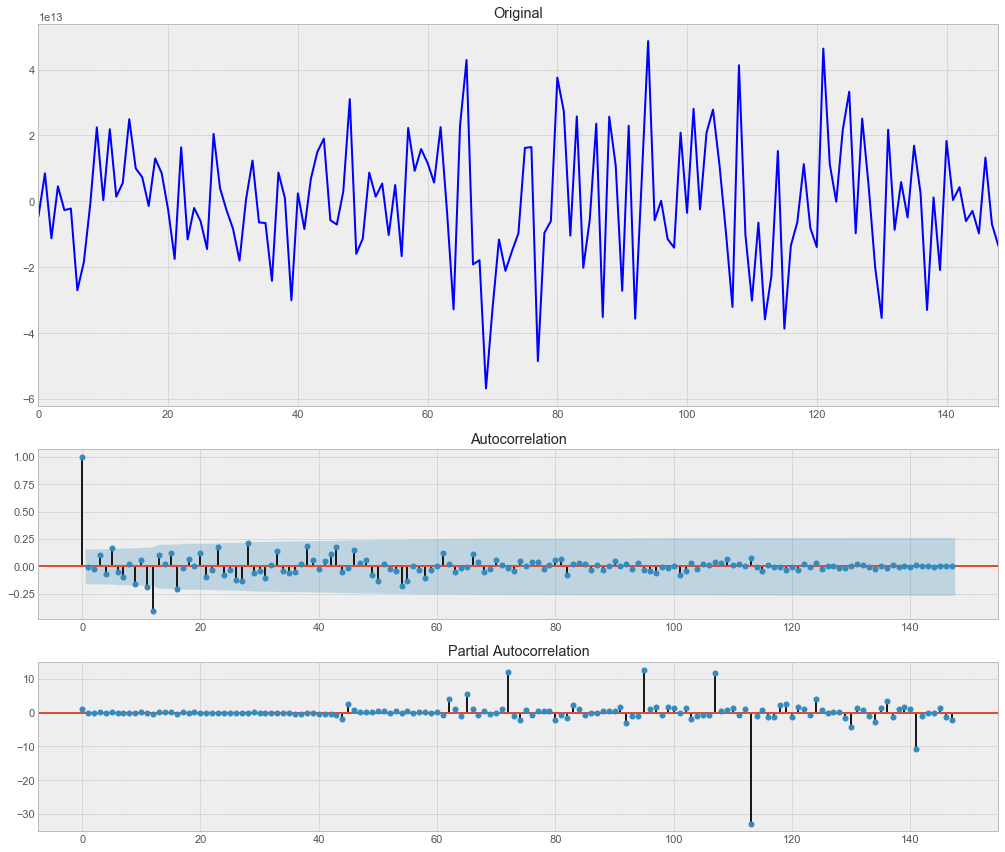

In [58]:
series = series[12:] - series[:-12]
tsplot(series, lags=len(series)-2)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

### _'daily-total-female-births-in-cal'_

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


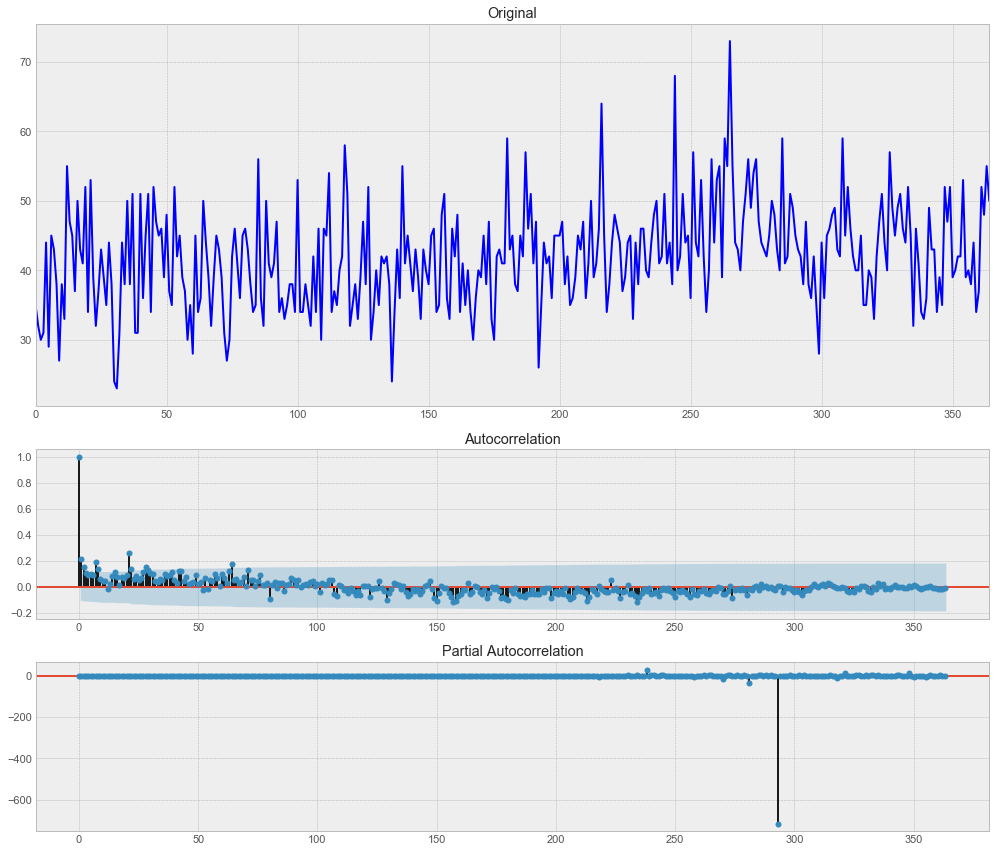

In [59]:
data_births = pd.read_csv('./Series/daily-total-female-births-in-cal.csv')['Count']
tsplot(data_births, lags=len(data_births)-2)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

In [ ]:
pass